## _*Using Grover's Search to Find a Solution to a SAT problem*_

This notebook demonstrates how to use the `Qiskit Aqua` library `Grover` search algorithm and process the result.

Further information is available for the algorithms in the github repo qiskit/aqua/readme.md

In [1]:
import pylab
import numpy as np
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua import run_algorithm
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicExpressionOracle

Suppose we have a [Satisfiability (SAT) problem](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem), for which we would like to use `Grover` search algorithm to find a satisfying solution. SAT problems are usually expressed in [Conjunctive Normal Forms (CNF)](https://en.wikipedia.org/wiki/Conjunctive_normal_form) and written in the [DIMACS-CNF](https://www.satcompetition.org/2009/format-benchmarks2009.html) format. For example:

In [2]:
sat_instance = '''
c example DIMACS-CNF SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

The CNF of this SAT instance contains 3 variables and 5 clauses:

$(\neg v_1 \vee \neg v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee v_3) \wedge (v_1 \vee v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee \neg v_3) \wedge (\neg v_1 \vee v_2 \vee v_3)$

It can be verified that this SAT problem instance has three satisfying solutions:

$(v_1, v_2, v_3) = (T, F, T)$ or $(F, F, F)$ or $(T, T, F)$

Or, expressed using the DIMACS notation:

`1 -2 3`, or `-1 -2 -3`, or `1 2 -3`.


With this example problem input, we then create the corresponding `oracle` for our `Grover` search. In particular, we use the `LogicExpressionOracle` component provided by Aqua, which supports parsing DIMACS-CNF format strings and constructing the corresponding oracle circuit.

In [3]:
oracle = LogicExpressionOracle(sat_instance)

The `oracle` can now be used to create an Grover instance:

In [4]:
grover = Grover(oracle)

We can then configure the backend and run the Grover instance to get the result:

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['result'])

[1, 2, -3]


As seen above, a satisfying solution to the specified SAT problem is obtained. And it is indeed one of the three satisfying solutions.

Since we used the `'qasm_simulator'`, the complete measurement result is also returned, as shown in the plot below, where it can be seen that the binary strings `000`, `011`, and `101` (note the bit order in each string), corresponding to the three satisfying solutions all have high probabilities associated with them.

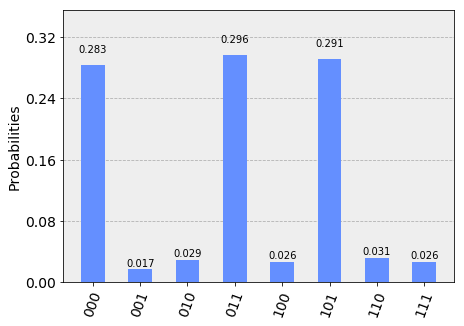

In [6]:
plot_histogram(result['measurement'])

The above step-by-step programatic approach can also be achieved by using a json configuration dictionary with the parameters for the algorithm and any other dependent objects it requires, as follows:

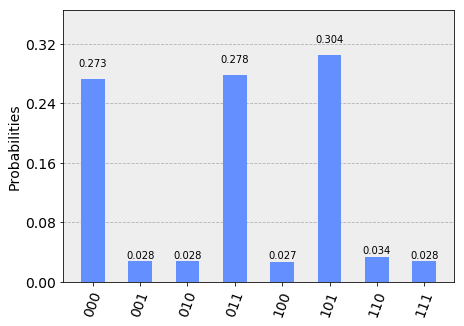

In [7]:
params = {
    'problem': {'name': 'search'},
    'algorithm': {
        'name': 'Grover'
    },
    'oracle': {
        'name': 'LogicExpressionOracle',
        'expression': sat_instance
    },
    'backend': {
        'shots': 1000
    }
}

result_dict = run_algorithm(params, backend=backend)
plot_histogram(result_dict['measurement'])